# Student Details
**Name: Yong Wei Lun <br>
ID: 1605763 <br>
Course: S.E <br>
Lecture: Dr. Tay Yong Haur**

# Building classifier with Fashion-MNIST datasets
3 types of classifier will be built
- Decision Tree Classifier using Scikit-Learn
- K-Nearest Neighbours Classifier using Scikit-Learn
- Keras Model Classifier 

## Import Fashion-MNIST datasets
Import datasets from keras, faster and easier

In [10]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import random

600000 data for training, 100000 for testing

In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


As the datasets in 3D, we reshape the array into 2D in order to fit in to Decision Tree and KNN,
28 * 28 = 784

In [12]:
x_train = np.array(x_train).reshape(-1, 784)
x_test = np.array(x_test).reshape(-1, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Visualising the datasets
Showing ramdom item from the datasets

In [55]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sanda",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

In [56]:
def randNum():
    return random.randint(0,1001)

def plotSammpleData():
    X = x_test[type].reshape(28, 28);
    plt.gray()
    plt.imshow(X)
    plt.show()
    
    print(y_test[type])
    print(label_dict[y_test[type]])
    
def plot_sample(ax, f1, f2, fontsize=12):
    num = randNum()
    ax.axis('off')
    ax.imshow(x_test[num].reshape(28, 28), cmap='gray')
    ax.set_title(label_dict[y_test[num]], fontsize=fontsize)

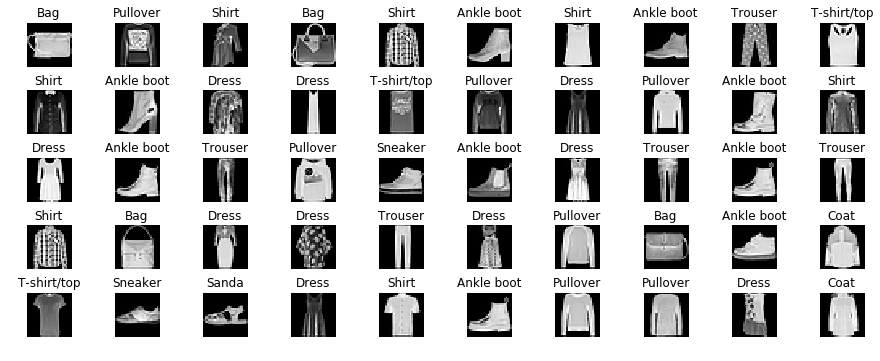

In [57]:
fig, axes = plt.subplots(5,10, figsize=(15,6))
# for attX in [0,1,2,3]:
#     for attY in [0,1,2,3]:
#         plot_sample(axes[attX, attY], attX, attY)
[plot_sample(axes[attX, attY], attX, attY) for attX in range(5) for attY in range(10) ]
fig.subplots_adjust(wspace=1)
plt.show()

### define ultilities function for developing classifier

In [29]:
#helper function to plot confusion matrix
def plotter(test, output):
    array = metrics.confusion_matrix(test, output)
    array = preprocessing.scale(array)
    df_cm = pd.DataFrame(array, index = [label_dict[i] for i in label_dict],
                      columns = [label_dict[i] for i in label_dict])
    plt.figure(figsize = (10,8))
    sn.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size": 8})
    plt.savefig('confusion_matrix-decisiontree.png', dpi=600)
    plt.show()

#helper function to perform random prediction on testing datasets
def random_predict(ax, f1, f2, model, fontsize=12):
    num = randNum()
    value = model.predict([x_test[num].reshape(784)])
    ax.axis('off')
    ax.imshow(x_test[num].reshape(28,28), cmap='gray_r')
    ax.set_title("Actual: " + label_dict[y_test[num]] + "\nPrediction: " + label_dict[value[0]], 
                 fontsize=fontsize)

# Decision Tree Classifier

In [16]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
y_test_dt = clf.predict(x_test)

#save model to file
joblib.dump(clf, 'fashion-mnist-model-decisiontree.pkl') 

print("Accuracy: ",metrics.accuracy_score(y_test, y_test_dt))

Accuracy:  0.7898


/home/wlun/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


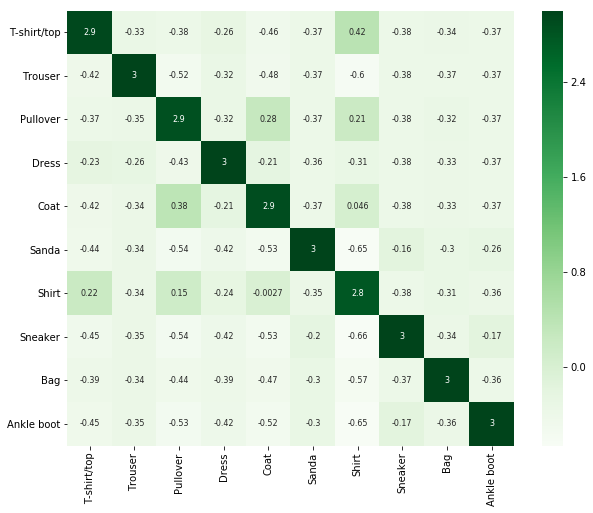

In [31]:
plotter(y_test, y_test_dt)

### Output from Confusion Matrix
the model is quite confused between
- T-shirt/top and Shirt. 
- Coat and Pullover.

### Prediction on random testing datasets

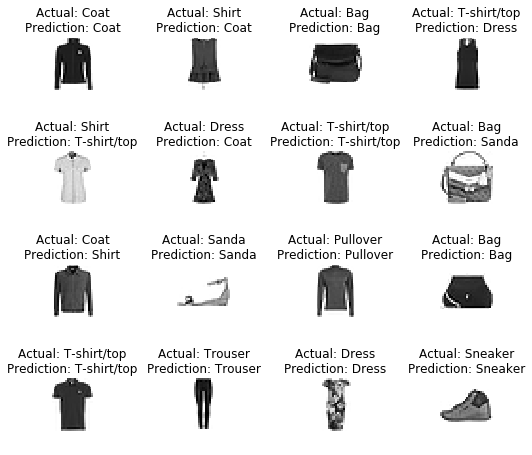

In [32]:
fig, axes = plt.subplots(4,4, figsize=(8,8))
[random_predict(axes[attX, attY], attX, attY, clf) for attX in range(4) for attY in range(4) ]
fig.subplots_adjust(wspace=1.5)
plt.show()

# K-Nearest Neighbours Classifier

In [ ]:
neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(x_train, y_train)

In [ ]:
y_test_knn = neighbors.predict(x_test)

In [ ]:
joblib.dump(neighbors, 'fashion-mnist-model-knn.pkl') 
print("Accuracy : ", metrics.accuracy_score(y_test, y_test_knn))

In [ ]:
plotter(y_test, y_test_knn)

In [ ]:
fig, axes = plt.subplots(4,4, figsize=(8,8))
[random_predict(axes[attX, attY], attX, attY, neighbors) for attX in range(4) for attY in range(4) ]
fig.subplots_adjust(wspace=1.5)
plt.show()